# Color Threshold, Blue Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

import cv2

%matplotlib inline

### Read in and display the image

In [2]:
# Read in the image
# img = mpimg.imread('./images/pizza_bluescreen.jpg')
img = cv2.imread('./images/pizza_bluescreen.jpg')
# Print out the type of image data and its dimensions (height, width, and color)
print('Type of this image is ', type(img),
     ' with dimensions : ', img.shape)

Type of this image is  <class 'numpy.ndarray'>  with dimensions :  (514, 816, 3)


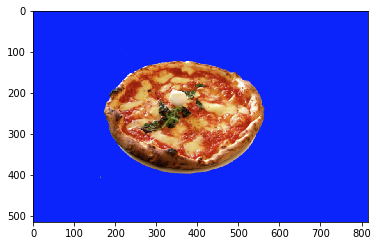

In [3]:
# Make a copy of the image
img_copy = np.copy(img)

# Change color to RGB (from BGR)
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
# Display the image copy

plt.imshow(img_copy)

### Define the color threshold

In [4]:
## TODO: Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_blue = np.array([0, 0, 200])
upper_blue = np.array([20, 40, 255])

### Create a mask

(514, 816)
[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


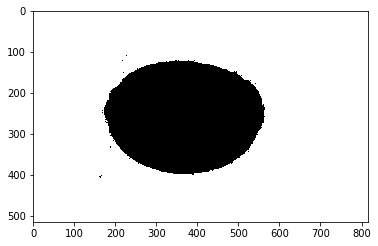

In [5]:
# Define the masked area
mask = cv2.inRange(img_copy, lower_blue, upper_blue)

print(mask.shape)
print(mask)
# Vizualize the mask
plt.imshow(mask, cmap='gray')

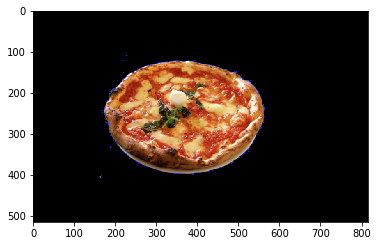

In [6]:
# Mask the image to let the pizza show through
masked_img = np.copy(img_copy)

masked_img[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_img)


### Mask and add a background image

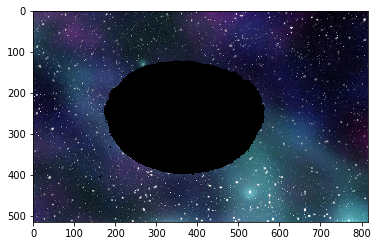

In [7]:
# Load in a background image, and convert it to RGB 
bg_img = cv2.imread('./images/space_background.jpg')
bg_img = cv2.cvtColor(bg_img, cv2.COLOR_BGR2RGB)

plt.imshow(bg_img)
# Crop it to the right size (514x816)
crop_bg = bg_img[0:514, 0:816]

plt.imshow(crop_bg)
# Mask the cropped background so that the pizza area is blocked
crop_bg[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_bg)

### Create a complete image

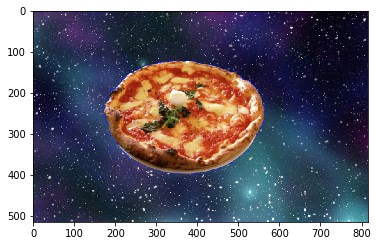

In [8]:
# Add the two images together to create a complete image!
complete_img = masked_img + crop_bg

# Display the result
plt.imshow(complete_img)